<a href="https://colab.research.google.com/github/shishir-py/machine-learning-intern-tasks/blob/main/Banking_lone_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank loan classification:
**Data Description**


* ID:	Customer ID
* Age:	Customer's age in completed years
* Experience:	years of professional experience
* Income:	Annual income of the customer ($000)

* ZIPCode:	Home Address ZIP code.
* Family	Family size of the customer
* CCAvg	Avg. spending on credit cards per month ($000)

* Education	Education Level: 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage	Value of house mortgage if any. ($000)
* Personal Loan	Did this customer accept the personal loan offered in the last campaign?
* Securities Account	Does the customer have a securities account with the bank?
* CD Account	Does the customer have a certificate of deposit (CD) account with the bank?
* Online	Does the customer use internet banking facilities?
* CreditCard	Does the customer use a credit card issued by UniversalBank?



# 1.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Reading the Excel file

In [2]:
#path of the file
excel_file = '/content/drive/MyDrive/exam_ml_intern/Bank_loan_data.xlsx'
#the file contains 2 sheet so need to specify the sheet
xl = pd.ExcelFile(excel_file)
sheet_names = xl.sheet_names
print(sheet_names)

# reading data sheet
data_frame = pd.read_excel(excel_file, sheet_name='Data')


['Description', 'Data']


In [3]:
data_frame

ID  Age Gender  Experience  Income  ZIP Code  Family  CCAvg  \
0        1   25    NaN           1    49.0     91107       4    1.6   
1        2   45    NaN          19    34.0     90089       3    1.5   
2        3   39    NaN          15    11.0     94720       1    1.0   
3        4   35    NaN           9   100.0     94112       1    2.7   
4        5   35    NaN           8    45.0     91330       4    1.0   
...    ...  ...    ...         ...     ...       ...     ...    ...   
4995  4996   29    NaN           3    40.0     92697       1    1.9   
4996  4997   30    NaN           4    15.0     92037       4    0.4   
4997  4998   63    NaN          39    24.0     93023       2    0.3   
4998  4999   65    NaN          40    49.0     90034       3    0.5   
4999  5000   28    NaN           4    83.0     92612       3    0.8   

      Education  Mortgage Home Ownership Personal Loan  Securities Account  \
0             1         0            NaN             0                   1   
1             1         0            NaN             0                   1   
2             1         0            NaN             0                   0   
3             2         0            NaN             0                   0   
4             2         0            NaN             0                   0   
...         ...       ...            ...           ...                 ...   
4995          3         0            NaN             0                   0   
4996          1        85            NaN             0                   0   
4997          3         0            NaN             0                   0   
4998          2         0            NaN             0                   0   
4999          1         0            NaN             0                   0   

      CD Account  Online  CreditCard  
0              0     0.0           0  
1              0     0.0           0  
2              0     0.0           0  
3              0     0.0           0  
4              0     0.0           1  
...          ...     ...         ...  
4995           0     1.0           0  
4996           0     1.0           0  
4997           0     0.0           0  
4998           0     1.0           0  
4999           0     1.0           1  

[5000 rows x 16 columns]

In [4]:
data_frame.columns

Index(['ID', 'Age', 'Gender', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Home Ownership', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
#checking if there was missing values or not
data_frame.isnull().any()

ID                    False
Age                   False
Gender                 True
Experience            False
Income                 True
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Home Ownership         True
Personal Loan         False
Securities Account    False
CD Account            False
Online                 True
CreditCard            False
dtype: bool

In [6]:
#finding the number of missing values in each columns
data_frame.isna().sum()

ID                       0
Age                      0
Gender                4520
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        4520
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [7]:
df=data_frame.copy()
df['Gender'].value_counts()

M    306
F    141
O     33
Name: Gender, dtype: int64

In [8]:
df['Home Ownership'].value_counts()


Home Mortage    219
Home Owner      138
Rent            123
Name: Home Ownership, dtype: int64

In [9]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  4933.000000   5000.000000   
mean   2500.500000    46.008200    20.104600    72.758159  93152.503000   
std    1443.520003    25.444898    11.467954    45.425519   2121.852197   
min       1.000000     0.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    63.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    95.000000  94608.000000   
max    5000.000000   978.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Securities Account  \
count  5000.000000  5000.000000  5000.000000  5000.000000         5000.000000   
mean      2.396400     1.937913     1.881000    56.498800            0.104400   
std       1.147663     1.747666     0.839869   101.713802            0.305809   
min       1.000000     0.000000     1.000000     0.000000            0.000000   
25%       1.000000     0.700000     1.000000     0.000000            0.000000   
50%       2.000000     1.500000     2.000000     0.000000            0.000000   
75%       3.000000     2.500000     3.000000   101.000000            0.000000   
max       4.000000    10.000000     3.000000   635.000000            1.000000   

       CD Account       Online   CreditCard  
count  5000.00000  4960.000000  5000.000000  
mean      0.06040     0.596976     0.294000  
std       0.23825     0.490555     0.455637  
min       0.00000     0.000000     0.000000  
25%       0.00000     0.000000     0.000000  
50%       0.00000     1.000000     0.000000  
75%       0.00000     1.000000     1.000000  
max       1.00000     1.000000     1.000000

# Summary




1.      Age: The average age of the customers is around 46 years, with a standard deviation of approximately 25.44. There is a minimum age of 0 and a maximum age of 978, which indicates the presence of outliers or potential data entry errors.

2. Experience: The average work experience is around 20 years, with a maximum value of 43. It is important to note that negative values are present in the dataset, which could be invalid or erroneous.

3. Income: The average annual income is approximately 72.76 thousand dollars, with a standard deviation of around 45.43. The income ranges from 8 thousand dollars to 224 thousand dollars.

4. ZIP Code: The ZIP Code column has missing values (67 missing entries out of 5000). It represents the postal code where the customer resides.

5. Family: The average number of family members is around 2.40, with a minimum of 1 and a maximum of 4. The majority of customers have 1 to 3 family members.

6. CCAvg: The average monthly credit card spending is approximately 1.94 thousand dollars, with a standard deviation of 1.75. The spending ranges from 0 to 10 thousand dollars per month.

7. Education: The education level is represented by numerical values, with 1 indicating a bachelor's degree, 2 indicating a master's degree, and 3 representing an advanced/professional degree.

8. Mortgage: The mortgage column represents the value of the home mortgage, if any. The average mortgage value is around 56.50 thousand dollars, with a maximum of 635 thousand dollars.

9. Securities Account, CD Account, Online, CreditCard: These columns indicate whether the customer has a securities account, certificate of deposit account (CD), online banking facility, or uses a credit card issued by the bank. They are binary variables with values of 0 or 1.








---



---



# Profile Reporting

In [10]:
%%capture
!pip install pandas_profiling

In [11]:
import pandas_profiling

In [12]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#1. Data preprocessing

In [13]:
df.columns

Index(['ID', 'Age', 'Gender', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Home Ownership', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [14]:
df2=df.copy()

In [15]:
df2.isna().sum()

ID                       0
Age                      0
Gender                4520
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        4520
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [16]:
df2['Online'].value_counts()

1.0    2961
0.0    1999
Name: Online, dtype: int64

In [17]:
missing_gender = df2[df2['Gender'].isnull()]
missing_home_ownership = df2[df2['Home Ownership'].isnull()]

# Checking if the missing values overlap
missing_overlap = missing_gender[missing_gender.index.isin(missing_home_ownership.index)]

# Checking the count of overlapping missing values
overlap_count = len(missing_overlap)



print("\nNumber of overlapping missing values:", overlap_count)


Number of overlapping missing values: 4520


**It shows that the missing rows in gender also missing in home ownership**

**Using domain knowledge the Gender and house ownership doesnot play significant role have having maximum rows so dropping is the best way to deal with**

In [18]:
#dropping the Gender and Home ownership columns
df3=df2.drop(['Gender','Home Ownership'], axis=1)

In [19]:
#filling the missing values of online using mode
df3["Online"] = df3["Online"].fillna(df3["Online"].mode()[0])


In [20]:
df3.isnull().sum()

ID                     0
Age                    0
Experience             0
Income                67
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

**Since the income column is important for predicting the loan status, and there are a significant number of missing values, I would not recommend using mean imputation in this case. Mean imputation would replace the missing values with the mean income, which would bias the model towards predicting that people with missing income are more likely to default on their loans.**

In [21]:
from sklearn.impute import KNNImputer

# Impute the missing values with hot-deck imputation
imputer = KNNImputer(n_neighbors=5)
df3["Income"] = imputer.fit_transform(df3[["Income"]])

# Save the dataset
df3.to_csv("data_imputed.csv")

**Here are some reasons why I think hot-deck imputation is the best solution in this case:**

1. It is a more complex method than mean imputation, but it is also more effective.
2. It is less likely to introduce bias into the model.
3. It preserves the distribution of the data.


In [22]:
df3.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [23]:
df3['Personal Loan'].value_counts()

0    4520
1     479
        1
Name: Personal Loan, dtype: int64

In [24]:
#the persoal loan has object data type
#convert the col to numerical
df3['Personal Loan'] = pd.to_numeric(df3['Personal Loan'], errors='coerce')



---



---



# EDA and Data Visualizations

<Axes: ylabel='Personal Loan'>

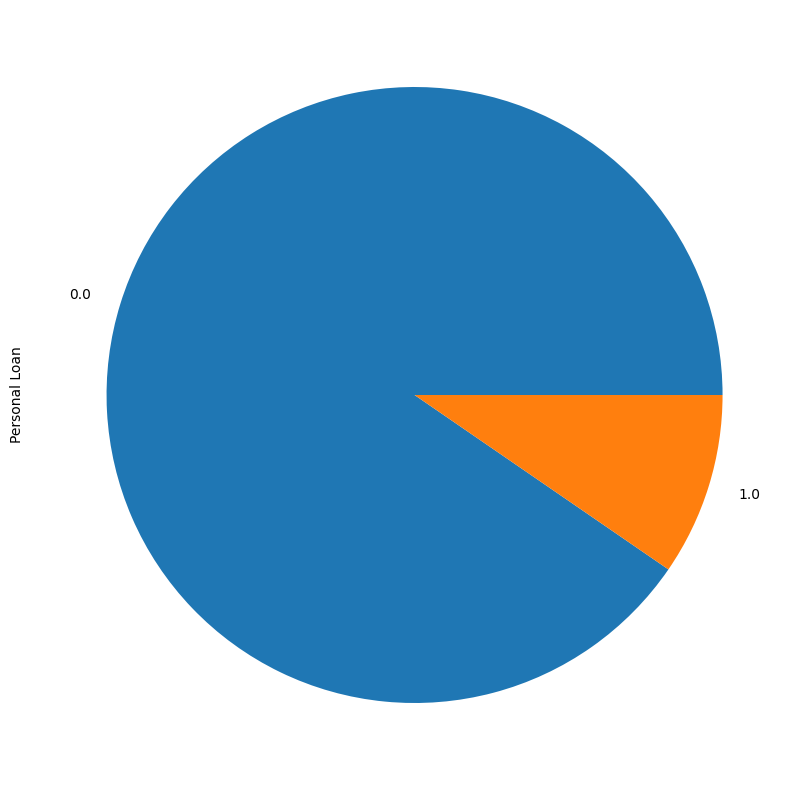

In [25]:
#counting the target variable occurence

__count = df3['Personal Loan'].value_counts()
__count.plot.pie(y='mass', figsize=(10, 10))




<Axes: >

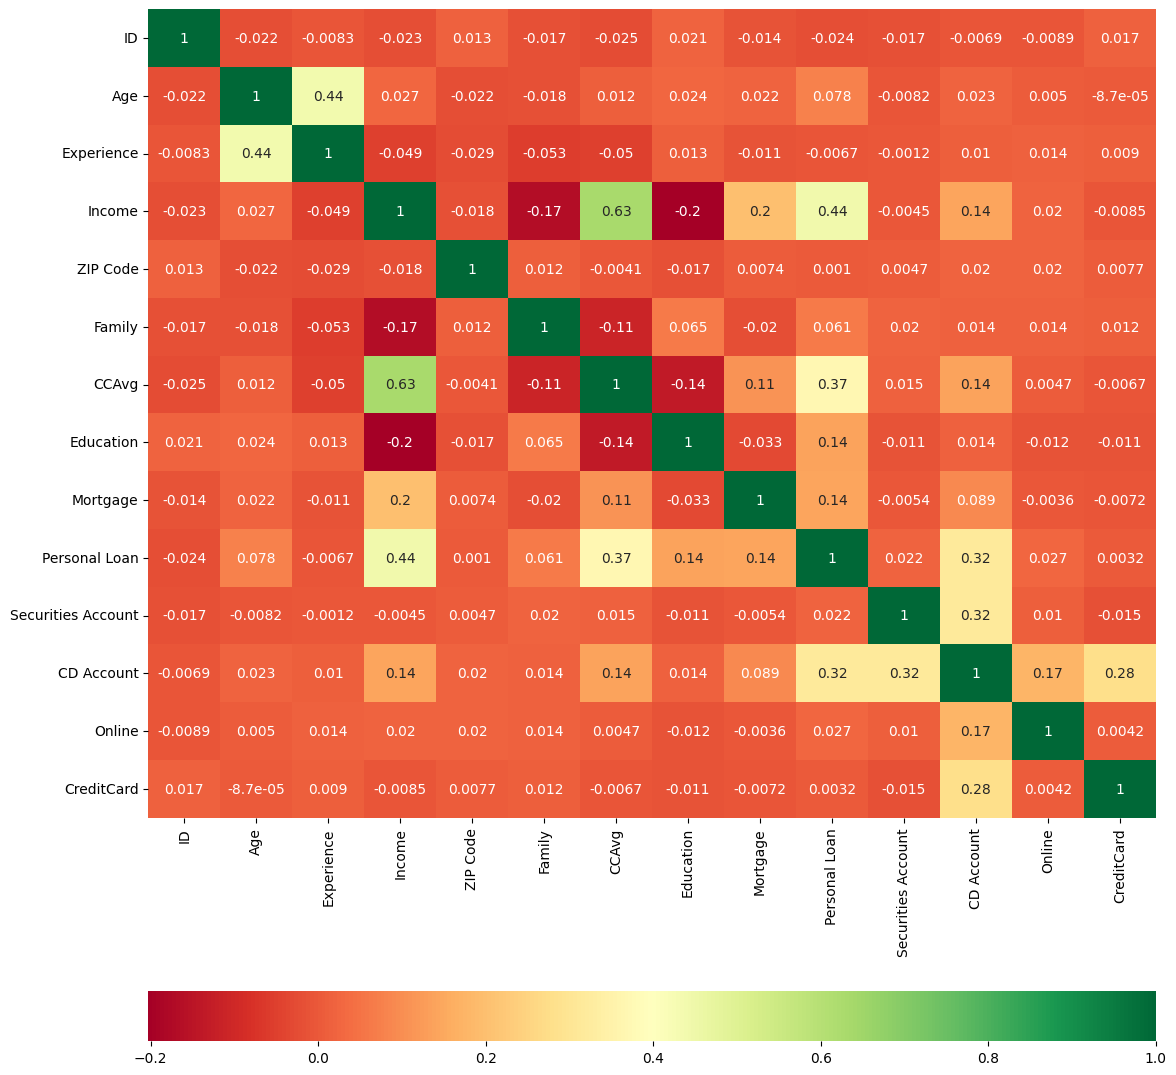

In [26]:
#plotting the correlation plot
cor_df = df3.corr(method='pearson')
plt.figure(figsize=(13,15))
sns.heatmap(cor_df, cmap='RdYlGn',annot=True,cbar_kws={"orientation": "horizontal"})




*   Personal Loan is highly correlated with Income, CD_Account, CCAvg.
*   Experience is highly correlated with Age
*   CCAvg is correlated with Income to a good extent






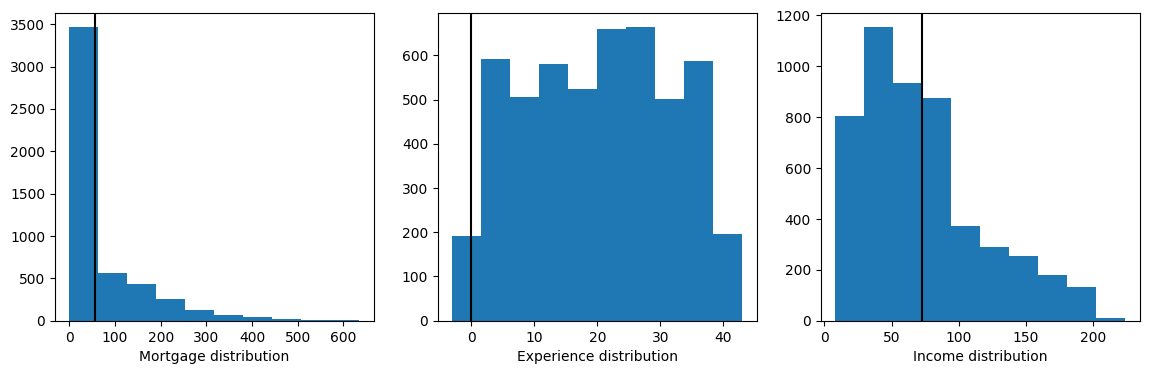

In [27]:
#plotting hist plot

fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df3.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(df.Mortgage.mean(), color = "black")

ax1.hist(df3.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(0, color = "black");

ax2.hist(df3.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(df.Income.mean(), color = "black");



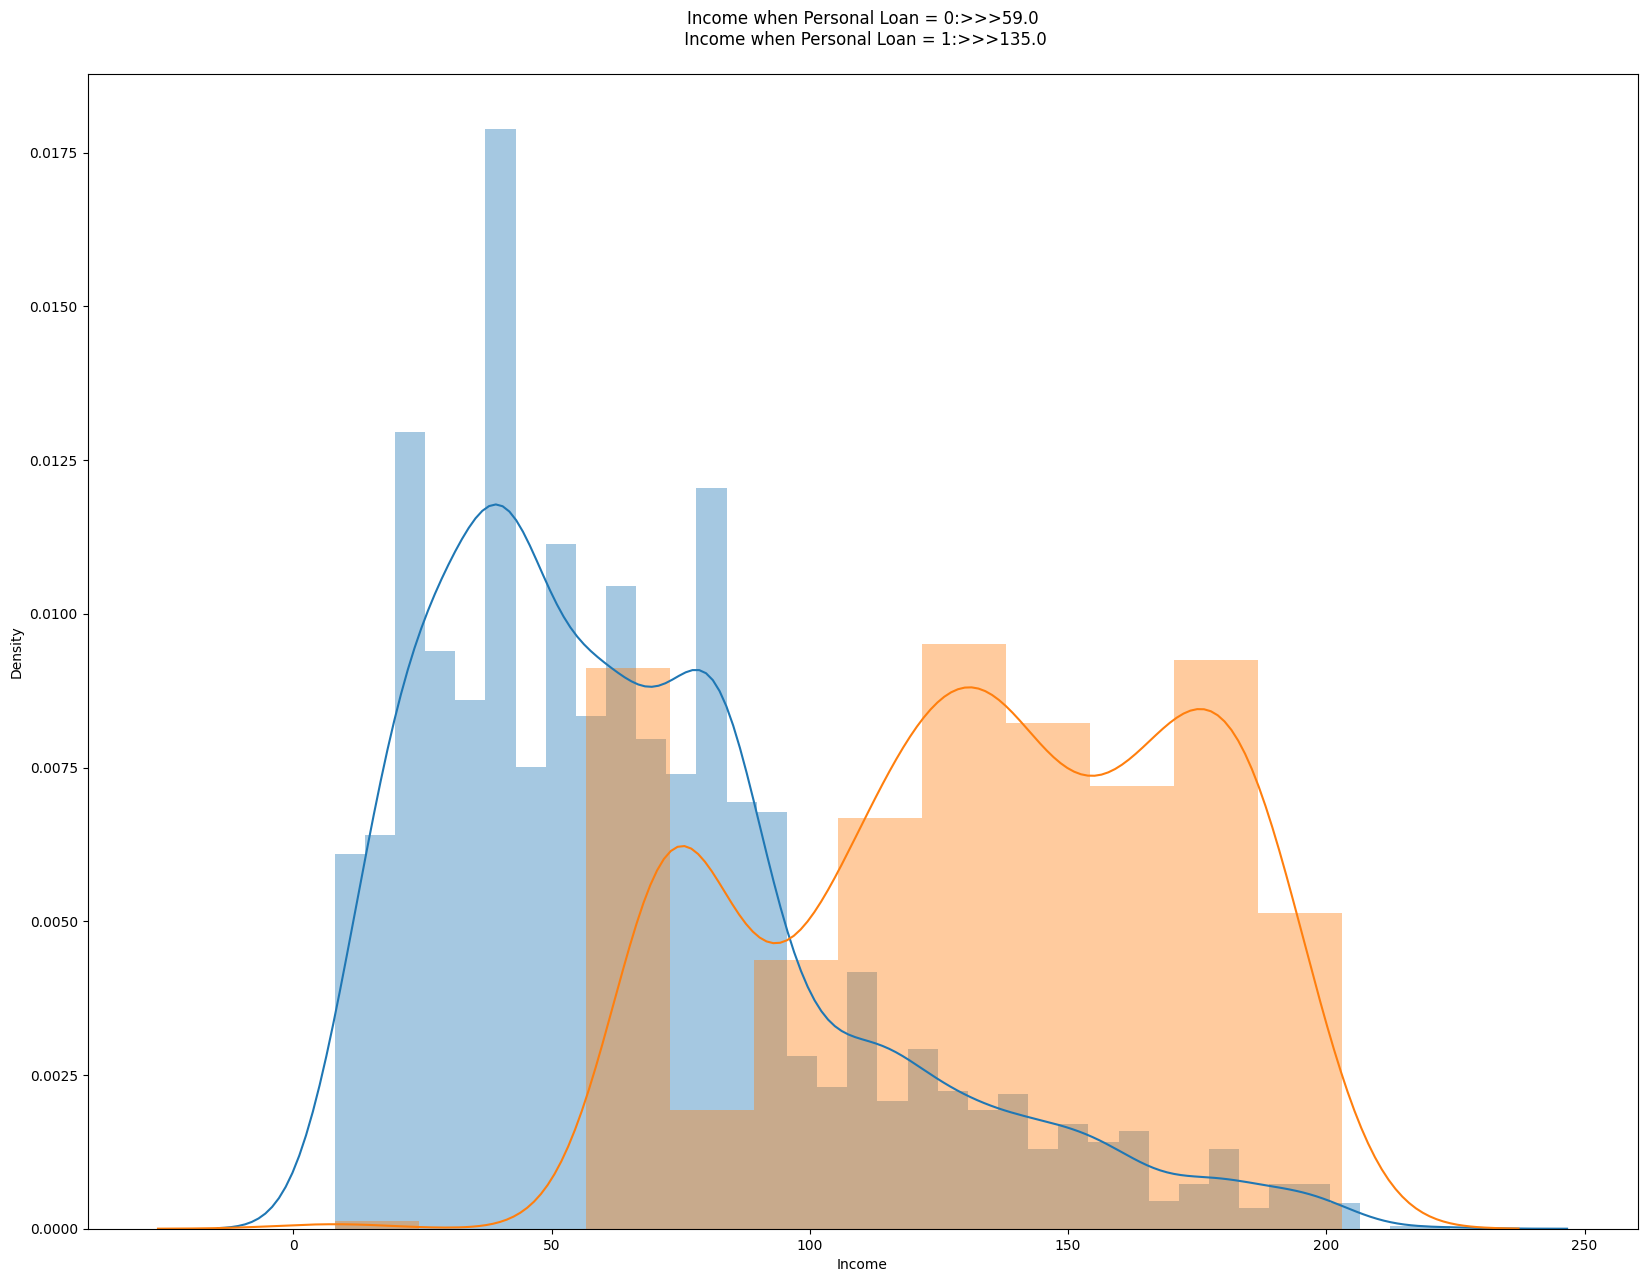

59.0
135.0


In [28]:
#plotting the realtioship with personal loan

plt.figure(figsize = (20,15))
sns.distplot( df3[df3["Personal Loan"] == 0]['Income']).set(title=f'Income when Personal Loan = 0:>>>{df3[df3["Personal Loan"] == 0]["Income"].median()}\n Income when Personal Loan = 1:>>>{df3[df3["Personal Loan"] == 1]["Income"].median()}\n')
sns.distplot( df3[df3["Personal Loan"] == 1]['Income'])
plt.show()
print(df3[df3["Personal Loan"] == 0]["Income"].median())
print(df3[df3["Personal Loan"] == 1]["Income"].median())



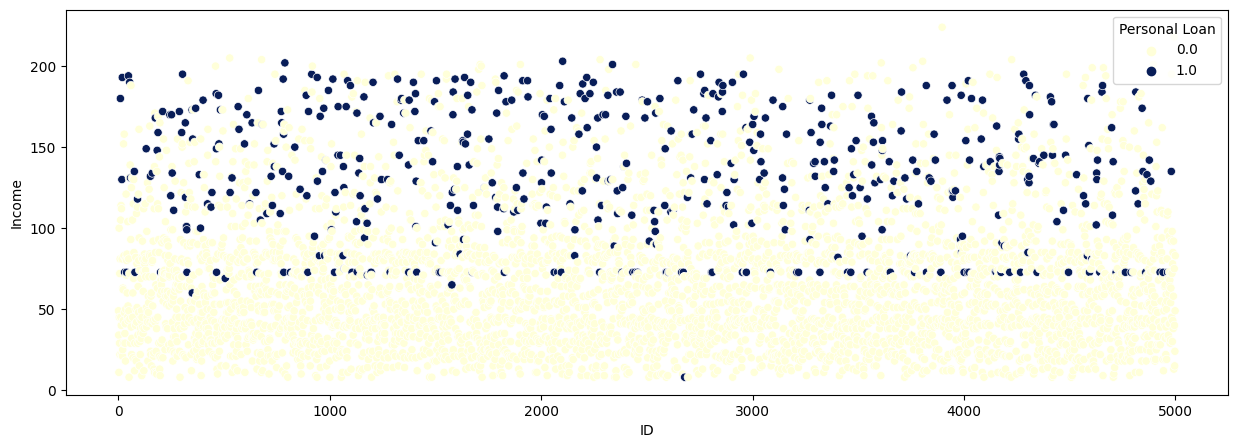

In [29]:
#loan with respect to income
plt.figure(figsize=(15,5))
sns.scatterplot(x = "ID", y = "Income", data=df3, hue = "Personal Loan", palette="YlGnBu", alpha = 1);

**In the income visualization, a clear distinction can be observed between borrowers and non-borrowers. The median income of borrowers is approximately 142.5, which is significantly higher compared to the median income of non-borrowers, which is around 59. This suggests that individuals with higher incomes are more likely to accept personal loans. Therefore, considering the income level can be a useful factor in determining loan approvals, as it indicates a higher likelihood of repayment for individuals with higher incomes.**

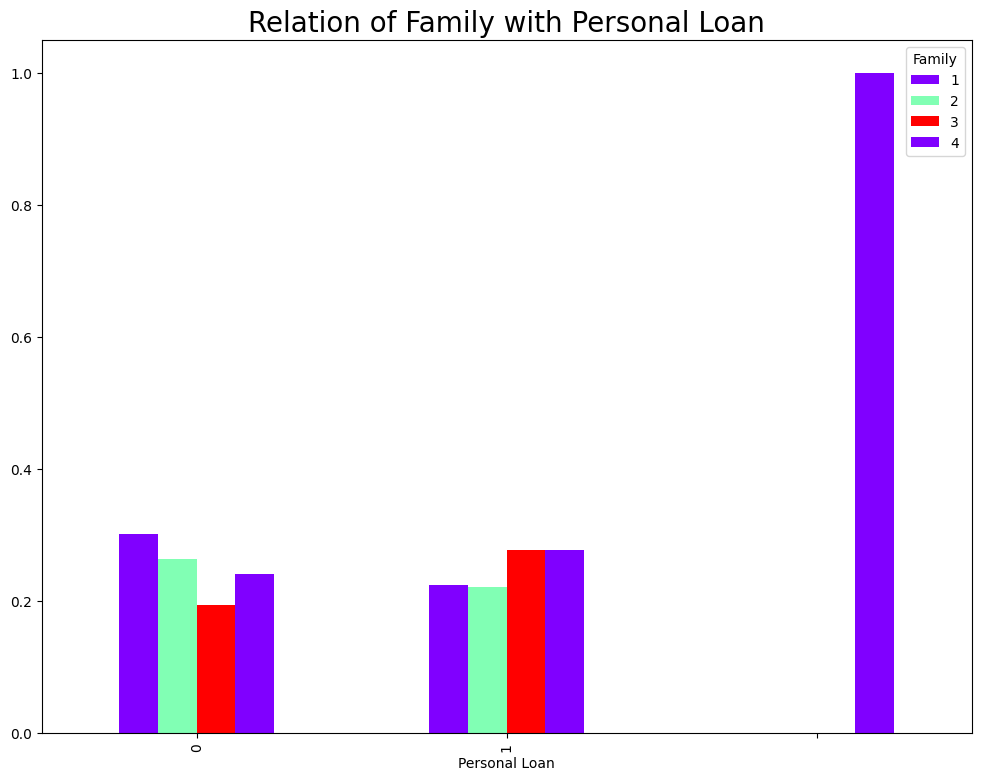

In [30]:


# show relation of family with personal loan

plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(df2['Personal Loan'], df3['Family'])
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                 stacked = False,
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 3,4)))
plt.title('Relation of Family with Personal Loan', fontsize = 20, fontweight = 30)
plt.show()



In [31]:
df3.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan         float64
Securities Account      int64
CD Account              int64
Online                float64
CreditCard              int64
dtype: object

#Noise Treatment

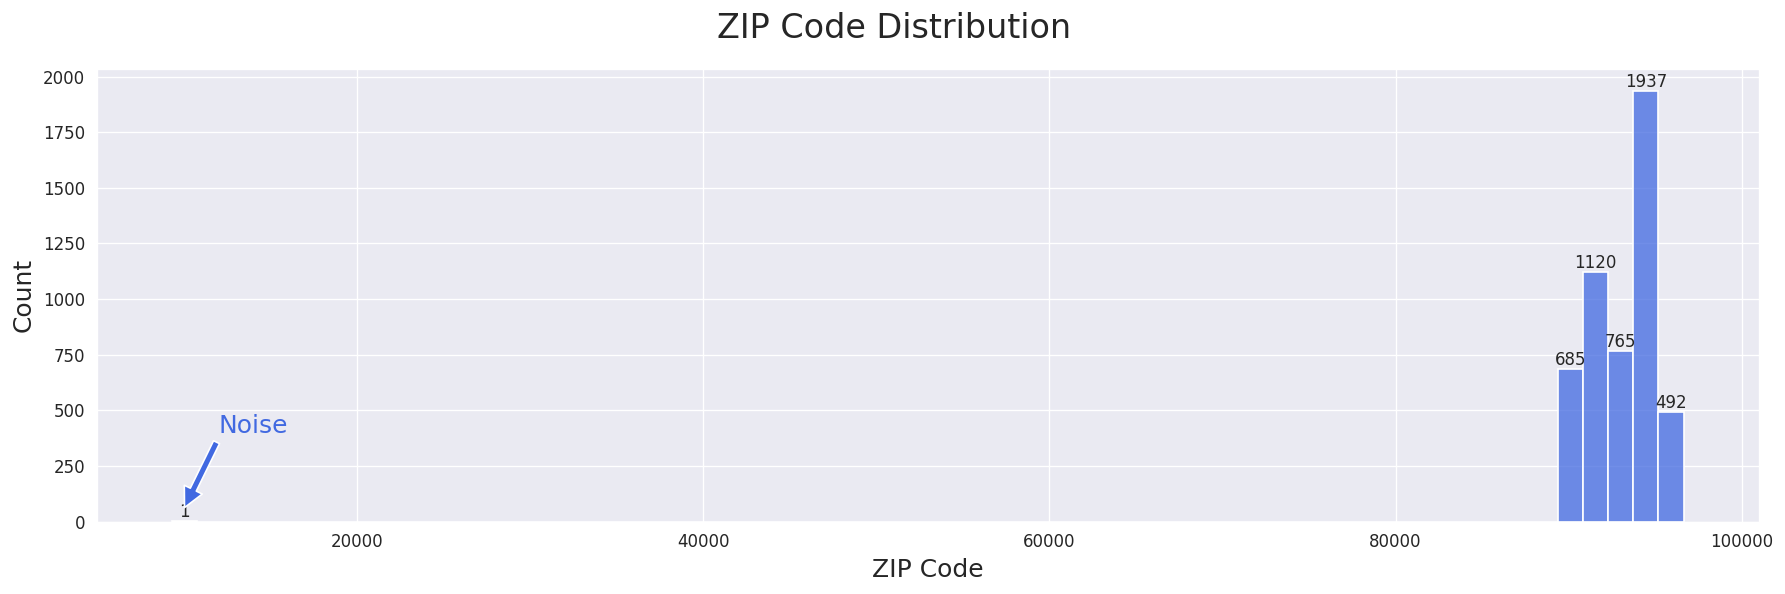

In [32]:
sns.set_style('darkgrid')
color = 'royalblue'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x='ZIP Code', data=df3, bins=60, color=color)

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.annotate('Noise', xy=(10000,60), xytext=(12000,400), color=color, fontsize=15,
             arrowprops=dict(facecolor=color, shrink=0.01))
plt.xlabel('ZIP Code', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('ZIP Code Distribution', fontsize=20)
plt.tight_layout()
plt.show()

In [33]:
df3[df3['ZIP Code']<20000]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25    21.0      9307       4    0.6          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0            0.0                   0           0     1.0   

     CreditCard  
384           1

In [34]:
#dropping the noise in Zip code
df3.drop(df3[df3['ZIP Code']<20000].index, inplace=True)
df3.reset_index(drop=True, inplace =True)

In [35]:
df[df['Experience']<0]['Experience'].count()

52

In [36]:
df[df['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

**The Experience feature contains a small number of noise values that are negative. We believe that these values are incorrectly recorded, and we replace them with their absolute value. This ensures that the Experience feature is accurate and that the model is not trained on incorrect data.**

In [37]:
df3['Experience'] = df3['Experience'].apply(abs)

## Outliers Treatment

In [38]:
df3.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

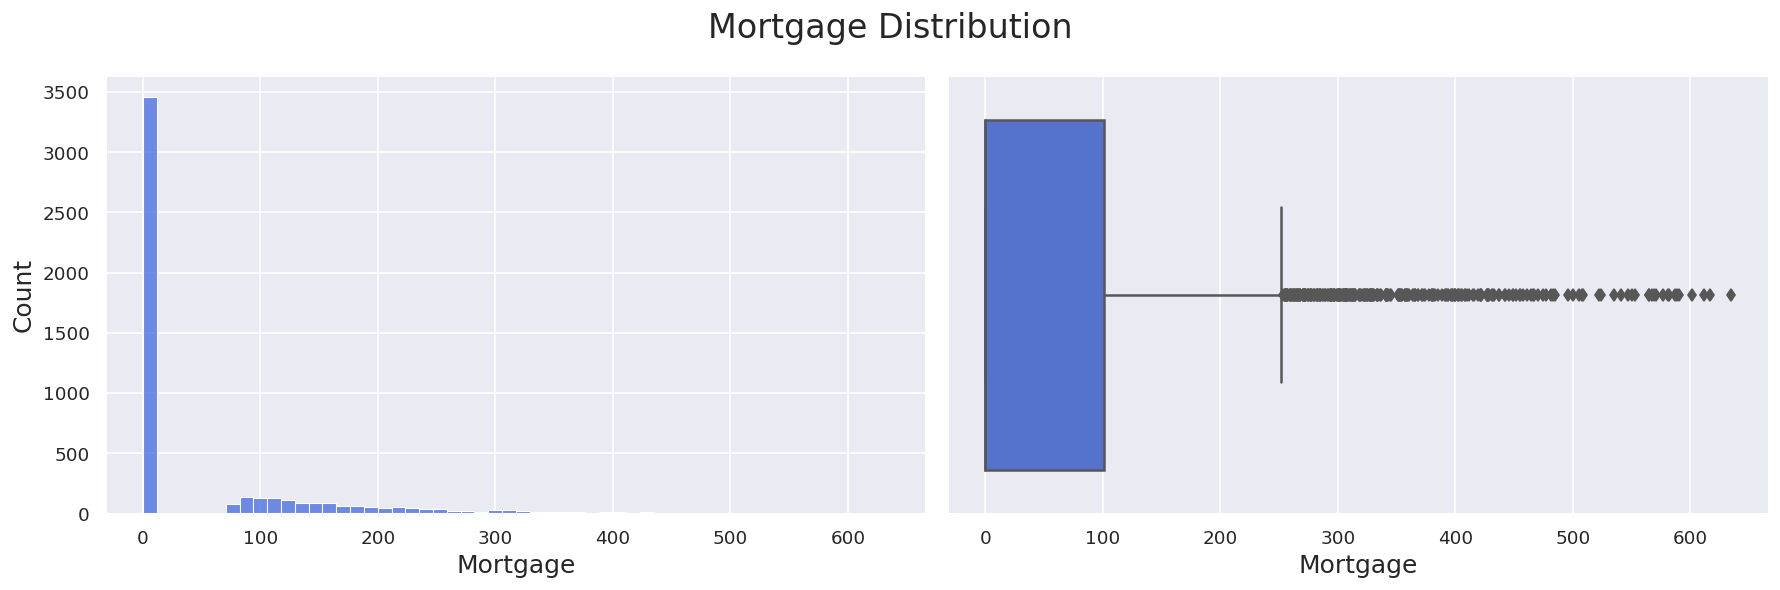

In [39]:
#plotting mortage distribution
sns.set(rc = {'axes.labelsize' : 15})
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)
sns.histplot(x='Mortgage', data=df3, color='royalblue', ax=ax[0])
sns.boxplot(x='Mortgage', data=df3, color='royalblue', ax=ax[1])
plt.suptitle('Mortgage Distribution', fontsize=20)
plt.tight_layout()
plt.show()

In [40]:
df3[stats.zscore(df3['Mortgage'])>3]['Mortgage'].count()

105

In [41]:
outlier_indexes = df3[stats.zscore(df3['Mortgage'])>3].index
df3.drop(outlier_indexes, inplace=True)
df3.reset_index(drop=True, inplace=True)

In [42]:
df3.shape

(4894, 14)

## Feature Enginnering


In [43]:
df3['CCAvg'] = df3['CCAvg']*12

# Income represents the amount of annual income, we convert average monthly credit card spending to annual

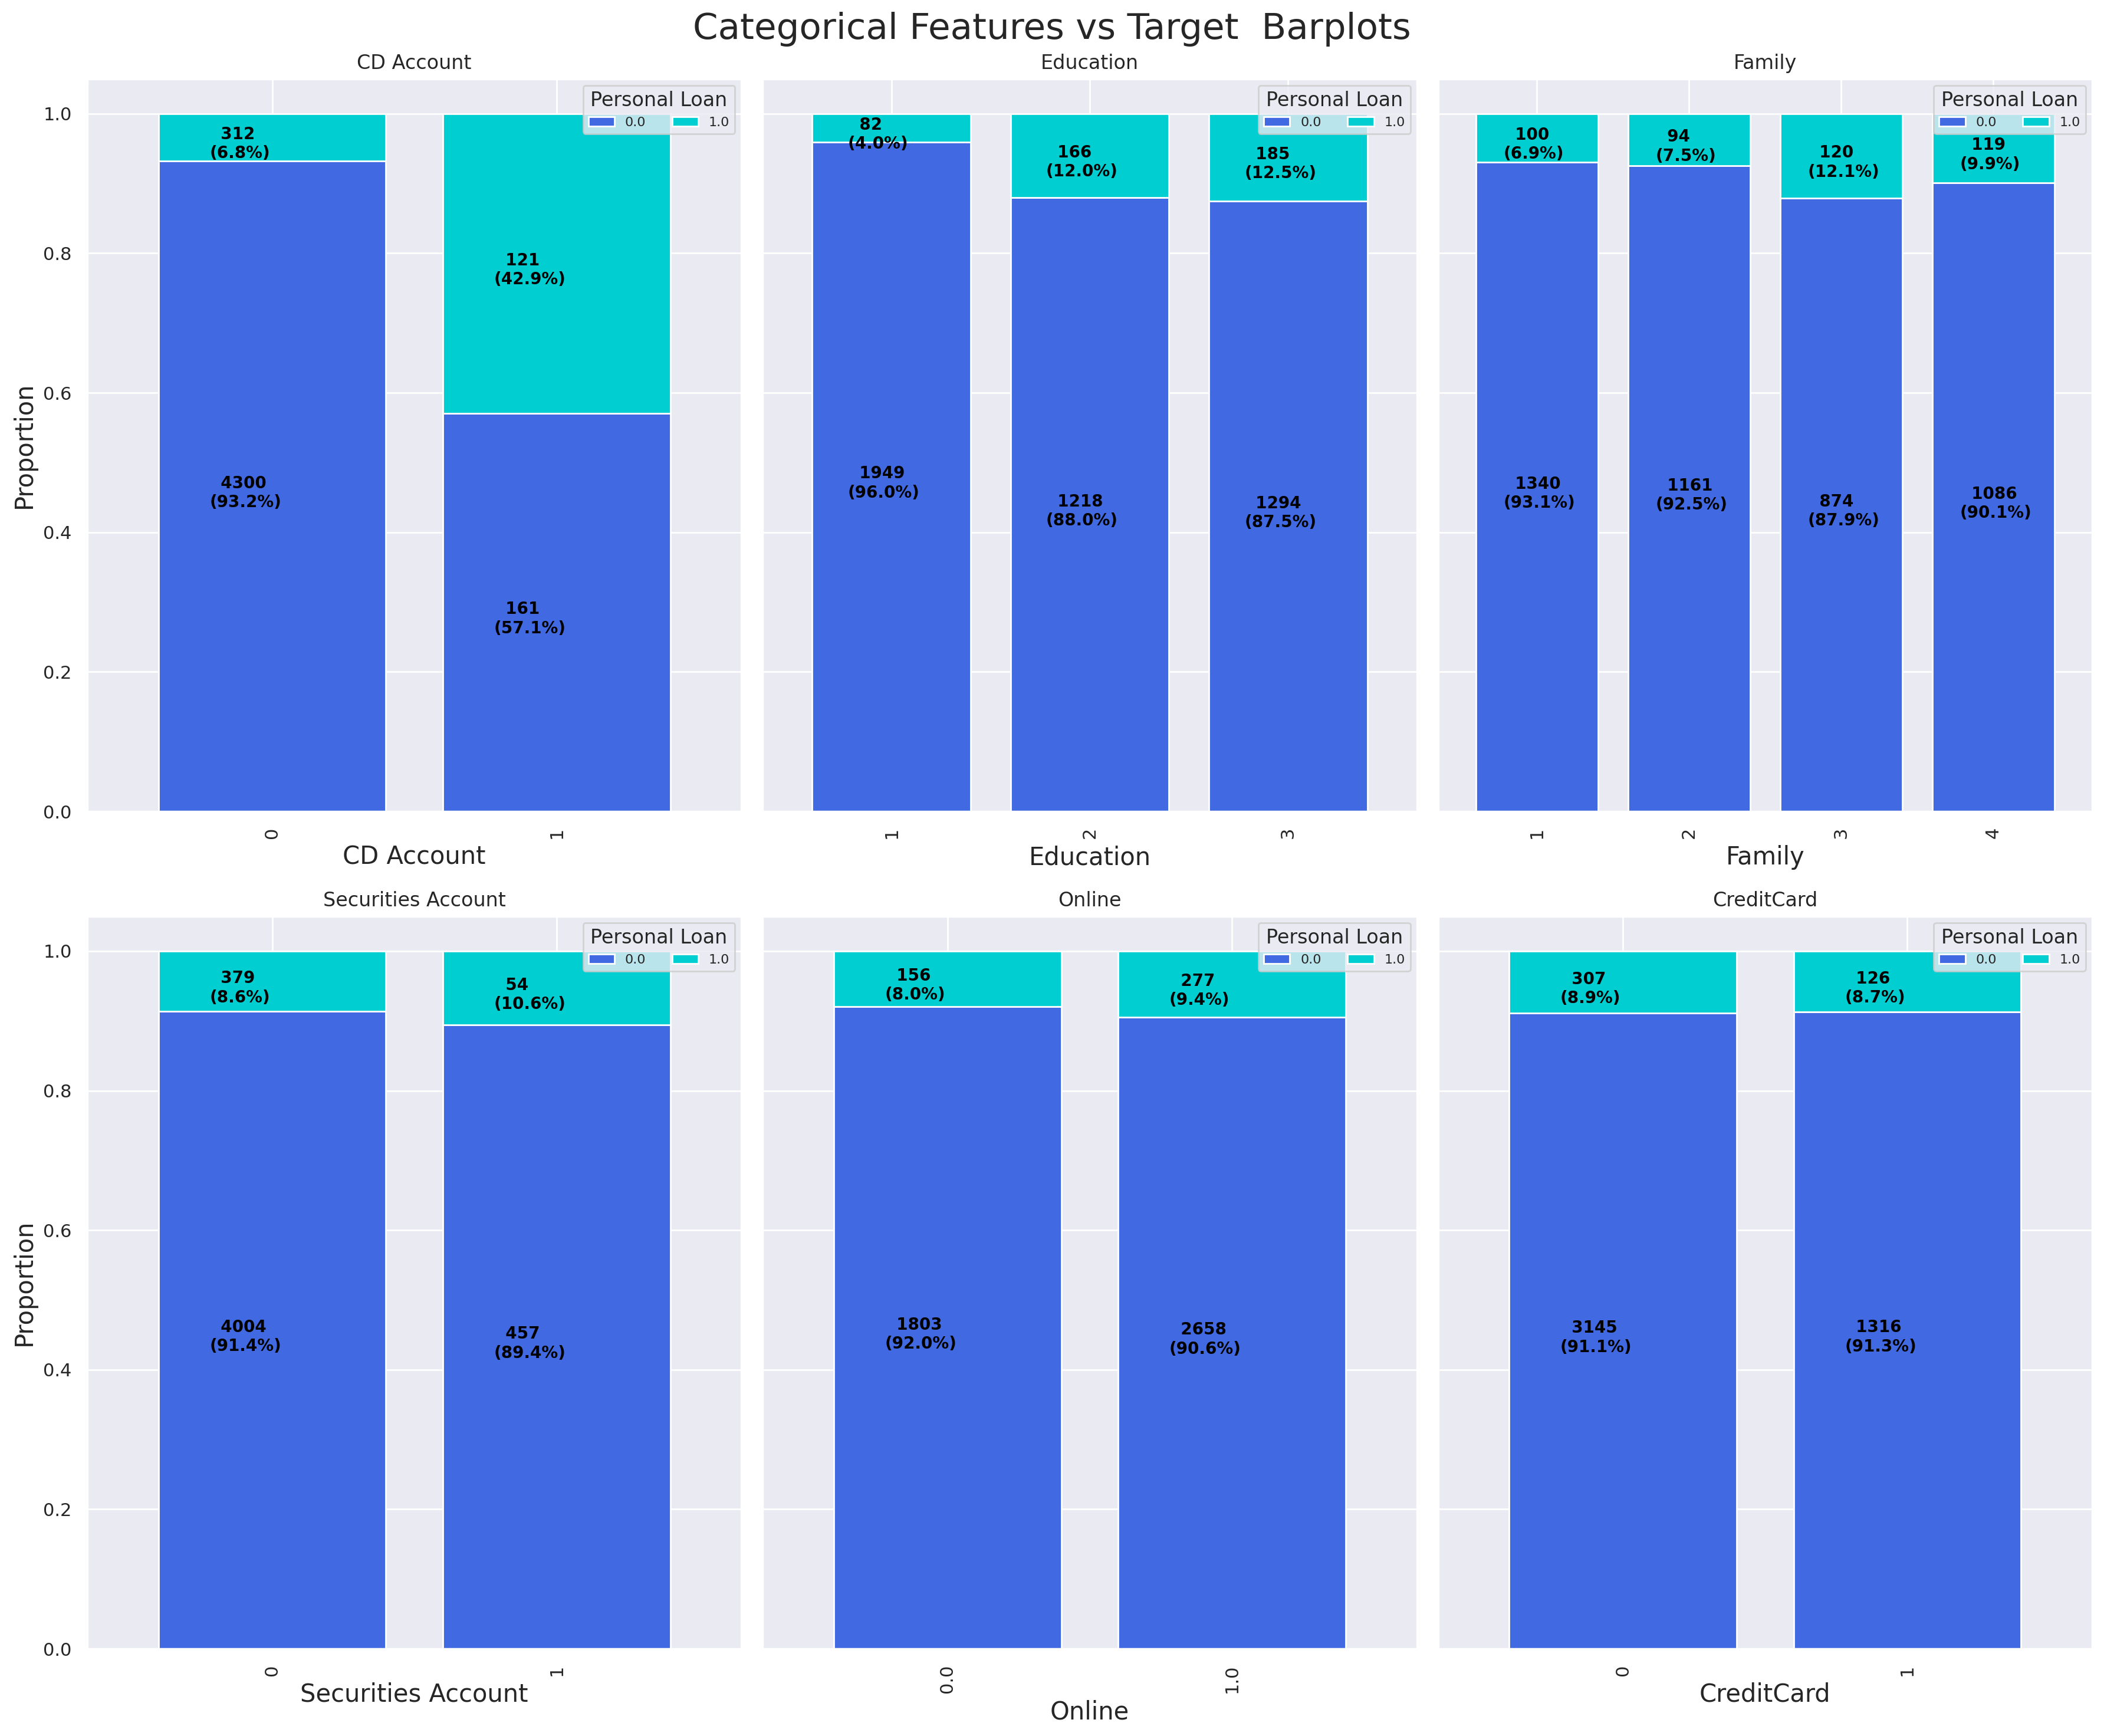

In [44]:



Cat_Features = ['CD Account', 'Education', 'Family', 'Securities Account', 'Online', 'CreditCard']

# Define the target name in a variable for simplicity
Target = 'Personal Loan'

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 15), dpi=200, sharey=True, tight_layout=True)

for i, col in enumerate(Cat_Features):

    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df3[col], columns=df3[Target])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df3[col], columns=df3[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['royalblue', 'darkturquoise'])

    # Plot stacked bar charts
    x, y = i // 3, i % 3
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion')

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx - 0.22, y=(y_location - proportion) + (proportion / 2) - 0.03,
                          s=f'  {count}\n({np.round(proportion * 100, 1)}%)',
                          color="black", fontsize=10, fontweight="bold")

    # Add title and labels
    ax[x, y].set_title(col)
    ax[x, y].set_xlabel(col)
    ax[x, y].set_ylabel('Proportion')

    # Add legend
    ax[x, y].legend(title='Personal Loan', loc='upper right', fontsize=8, ncol=2)

plt.suptitle('Categorical Features vs Target  Barplots', fontsize=22)
plt.show()


**Conclusion**


1.   People having certificate of deposit tends to have loan approval than who dont have
2.   People having higher education level have better loan approval rate
3. securities account, online and credit card doesnot have significent role





---



---



**The dataset seems to be badly imbalance let's see**

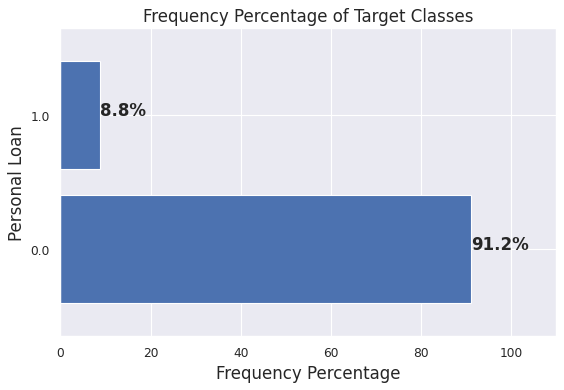

In [45]:
plt.figure(dpi=80)

# Plot frequency percentages barplot
df3['Personal Loan'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = df3['Personal Loan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

**It shows that the class is highly imbalanced**


*   Effect:


  1.   Imbalanced datasets can lead to algorithms that are biased towards the majority class.
  2.  If a model is trained on data which is heavily imbalanced, it can develop an incorrect understanding of the underlying trends in the data


*  solution:


  1.   The approach to train test split when dealing with imbalanced datasets is to use stratification






# Train Test Split

In [46]:
df3.dtypes


ID                      int64
Age                     int64
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan         float64
Securities Account      int64
CD Account              int64
Online                float64
CreditCard              int64
dtype: object

In [47]:
X=df3.drop(['ID','Personal Loan'],axis=1)
y=df3['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#defining feature selection & scaling
scaler=StandardScaler()

preprocessor=ColumnTransformer(
    transformers=[
        ('num',scaler,['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage'])
    ],
    remainder='passthrough'
)

#preprocessing pipeline
preprocessing_pipeline=Pipeline([
    ('preprocessor', preprocessor)
])

X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

#train the model

In [49]:

# Create the XGBoost classifier
model_xgb = xgb.XGBClassifier()

# Train the model
model_xgb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_xgb.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
log_loss_error= log_loss(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('log_loss:', log_loss_error)
print('roc_auc_score:', roc_auc_score)
print('f1_score:', f1_score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9887640449438202
log_loss: 0.4049848695406424
roc_auc_score: 0.9523413741559714
f1_score: 0.9349112426035503
[[889   3]
 [  8  79]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       892
         1.0       0.96      0.91      0.93        87

    accuracy                           0.99       979
   macro avg       0.98      0.95      0.96       979
weighted avg       0.99      0.99      0.99       979



              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       892
         1.0       1.00      0.83      0.91        87

    accuracy                           0.98       979
   macro avg       0.99      0.91      0.95       979
weighted avg       0.98      0.98      0.98       979

Model accuracy: 0.9846782431052093


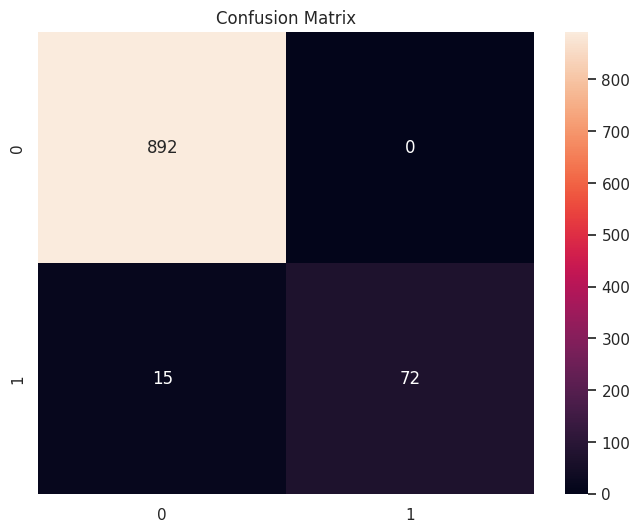

<Figure size 1200x900 with 0 Axes>

In [50]:
from sklearn import metrics
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train_scaled ,y_train)

y_pred = RFC_model.predict(X_test_scaled)
# Print classification report and accuracy
print(metrics.classification_report(y_test, y_pred))
print(f"Model accuracy: {metrics.accuracy_score(y_test, y_pred)}")

# Calculate and plot the confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.title('Confusion Matrix')
plt.show()


plt.tight_layout()  # Adjust the spacing between subplots if needed
plt.show()

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       892
         1.0       0.87      0.94      0.91        87

    accuracy                           0.98       979
   macro avg       0.93      0.96      0.95       979
weighted avg       0.98      0.98      0.98       979

Model accuracy:0.982635342185904


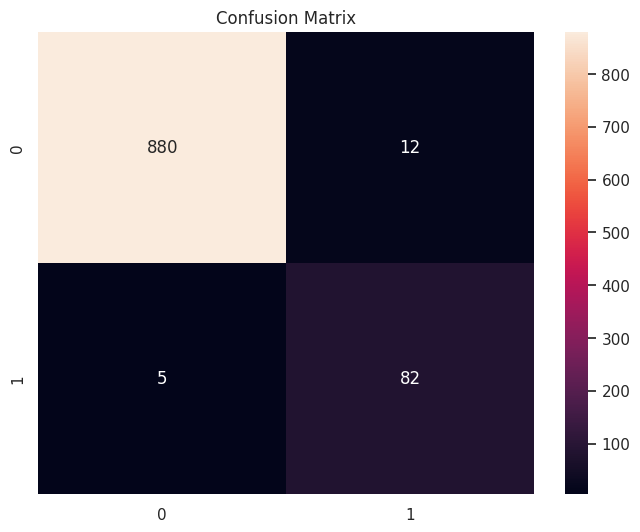

<Figure size 1200x900 with 0 Axes>

In [51]:
from sklearn.tree import DecisionTreeClassifier
RFC_model = DecisionTreeClassifier()
RFC_model.fit(X_train_scaled ,y_train)

y_pred = RFC_model.predict(X_test_scaled)
print(metrics.classification_report(y_test,y_pred))
print(f"Model accuracy:{metrics.accuracy_score(y_test, y_pred)}")

# Calculate and plot the confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.title('Confusion Matrix')
plt.show()


plt.tight_layout()  # Adjust the spacing between subplots if needed
plt.show()



---



---



# Tuning Models

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


## n_jobs = -1 uses all cores of processor
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced_subsample')

param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20]}

rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3, n_iter=10)
rfc_cv_grid.fit(X_train_scaled, y_train)
rfc_cv_grid.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=18,
                       min_samples_leaf=5, n_jobs=-1)

In [53]:
rfc2_train_predictions = rfc_cv_grid.predict(X_train_scaled)
rfc2_test_predictions = rfc_cv_grid.predict(X_test_scaled)

print(accuracy_score(y_train,rfc2_train_predictions))

### Test data accuracy
print(accuracy_score(y_test,rfc2_test_predictions))

0.9897828863346104
0.9724208375893769


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       892
         1.0       0.81      0.90      0.85        87

    accuracy                           0.97       979
   macro avg       0.90      0.94      0.92       979
weighted avg       0.97      0.97      0.97       979

Model accuracy:0.9724208375893769


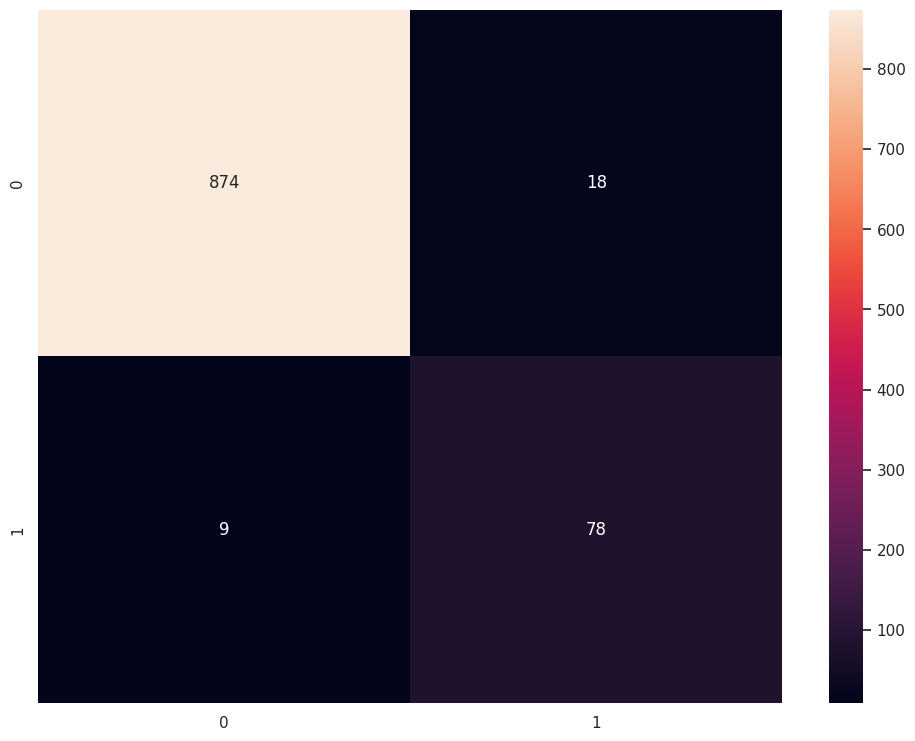

In [54]:
print(metrics.classification_report(y_test,rfc2_test_predictions))
print(f"Model accuracy:{metrics.accuracy_score(y_test, rfc2_test_predictions)}")

conf_mat = metrics.confusion_matrix(y_test, rfc2_test_predictions)
sns.heatmap(conf_mat, annot=True,fmt = "g")
plt.show()


In [55]:
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
log_loss_xgb = metrics.log_loss(y_test, y_pred_xgb)
roc_auc_score_xgb = metrics.roc_auc_score(y_test, y_pred_xgb)
f1_score_xgb = metrics.f1_score(y_test, y_pred_xgb)

# Create the RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_scaled, y_train)
y_pred_rfc = rfc_model.predict(X_test_scaled)
accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
log_loss_rfc = metrics.log_loss(y_test, y_pred_rfc)
roc_auc_score_rfc = metrics.roc_auc_score(y_test, y_pred_rfc)
f1_score_rfc = metrics.f1_score(y_test, y_pred_rfc)

# Create the DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train_scaled, y_train)
y_pred_dtc = dtc_model.predict(X_test_scaled)
accuracy_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
log_loss_dtc = metrics.log_loss(y_test, y_pred_dtc)
roc_auc_score_dtc = metrics.roc_auc_score(y_test, y_pred_dtc)
f1_score_dtc = metrics.f1_score(y_test, y_pred_dtc)

# Create the Tuned RandomForestClassifier
tuned_rfc_model = RandomForestClassifier(max_depth=10, n_estimators=100)
tuned_rfc_model.fit(X_train_scaled, y_train)
y_pred_tuned_rfc = tuned_rfc_model.predict(X_test_scaled)
accuracy_tuned_rfc = metrics.accuracy_score(y_test, y_pred_tuned_rfc)
log_loss_tuned_rfc = metrics.log_loss(y_test, y_pred_tuned_rfc)
roc_auc_score_tuned_rfc = metrics.roc_auc_score(y_test, y_pred_tuned_rfc)
f1_score_tuned_rfc = metrics.f1_score(y_test, y_pred_tuned_rfc)

# Create a DataFrame to store the evaluation metrics
data = {
    'Model': ['XGBoost', 'RandomForest', 'DecisionTree', 'Tuned RandomForest'],
    'Accuracy': [accuracy_xgb, accuracy_rfc, accuracy_dtc, accuracy_tuned_rfc],
    'Log Loss': [log_loss_xgb, log_loss_rfc, log_loss_dtc, log_loss_tuned_rfc],
    'ROC AUC Score': [roc_auc_score_xgb, roc_auc_score_rfc, roc_auc_score_dtc, roc_auc_score_tuned_rfc],
    'F1 Score': [f1_score_xgb, f1_score_rfc, f1_score_dtc, f1_score_tuned_rfc]
}
df = pd.DataFrame(data)

# Print the DataFrame
print(df)



                Model  Accuracy  Log Loss  ROC AUC Score  F1 Score
0             XGBoost  0.988764  0.404985       0.952341  0.934911
1        RandomForest  0.983657  0.589069       0.913233  0.900000
2        DecisionTree  0.981614  0.662703       0.958791  0.900000
3  Tuned RandomForest  0.985700  0.515435       0.924727  0.913580


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Accuracy: 0.9908069458631257
F1 Score: 0.9467455621301775


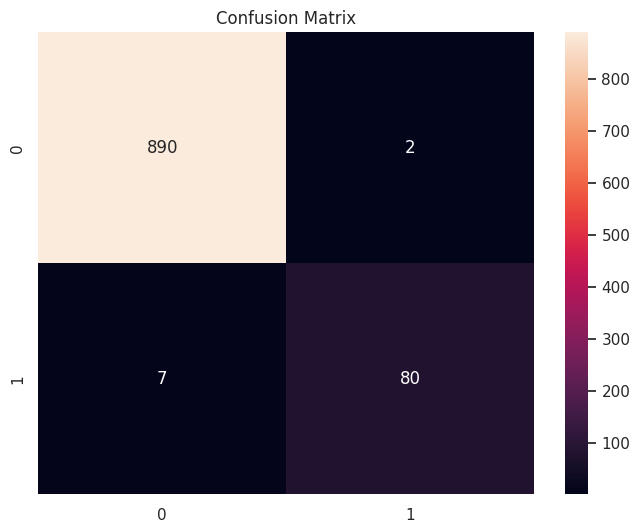

<Figure size 1200x900 with 0 Axes>

In [56]:
# Create the XGBoost classifier
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score_rfc2=metrics.f1_score(y_test, y_pred)


print('Best Hyperparameters:', best_params)
print('Accuracy:', accuracy)
print('F1 Score:', f1_score_rfc2)

conf_mat = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.title('Confusion Matrix')
plt.show()


plt.tight_layout()  # Adjust the spacing between subplots if needed
plt.show()

# Exporting the model



---



---



In [61]:
%%capture
!pip install joblib


In [62]:
import joblib

In [63]:
# save preprocessing pipeline and model

joblib.dump(preprocessing_pipeline,'preprocessing.pkl')
joblib.dump(best_model, 'trained_model.pkl')

['trained_model.pkl']

# Loading the saved model

In [64]:
preprocessing_pipeline=joblib.load('preprocessing.pkl')
loaded_model=joblib.load('trained_model.pkl')

In [65]:
#read unseen data
unseen_test_path="/content/drive/MyDrive/exam_ml_intern/test_set.xlsx"
test_df=pd.read_excel(unseen_test_path)

In [83]:
subset=test_df.head(50).drop('ID',axis=1)

In [84]:
subset.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [85]:
new_x_test=subset.drop('Personal Loan', axis=1)
new_y_test=subset['Personal Loan']

In [86]:
X_new_processed=preprocessing_pipeline.transform(new_x_test)

In [87]:
prediction =loaded_model.predict(X_new_processed)

In [88]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0])